In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv(r"C:\Users\chees\Downloads\News.csv")
data.head()


,Unnamed: 0,title,text,subject,date,class
0,0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [3]:
data = data.drop(["title", "subject","date"], axis = 1)


In [4]:
# Shuffling
data = data.sample(frac=1)
data.reset_index(inplace=True)
data.drop(["index"], axis=1, inplace=True)


<AxesSubplot: xlabel='class', ylabel='count'>

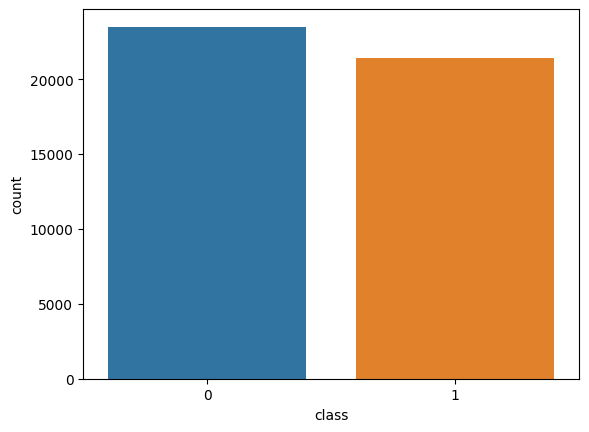

In [5]:
sns.countplot(data=data,
			x='class',
			order=data['class'].value_counts().index)


In [6]:
from tqdm import tqdm
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chees\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chees\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
!pip install nltk

You should consider upgrading via the 'C:\Users\chees\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [8]:
!pip install wordcloud

You should consider upgrading via the 'C:\Users\chees\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [9]:
def preprocess_text(text_data):
	preprocessed_text = []
	
	for sentence in tqdm(text_data):
		sentence = re.sub(r'[^\w\s]', '', sentence)
		preprocessed_text.append(' '.join(token.lower()
								for token in str(sentence).split()
								if token not in stopwords.words('english')))

	return preprocessed_text


In [10]:
preprocessed_review = preprocess_text(data['text'].values)
data['text'] = preprocessed_review

100%|██████████| 44919/44919 [2:08:25<00:00,  5.83it/s]  


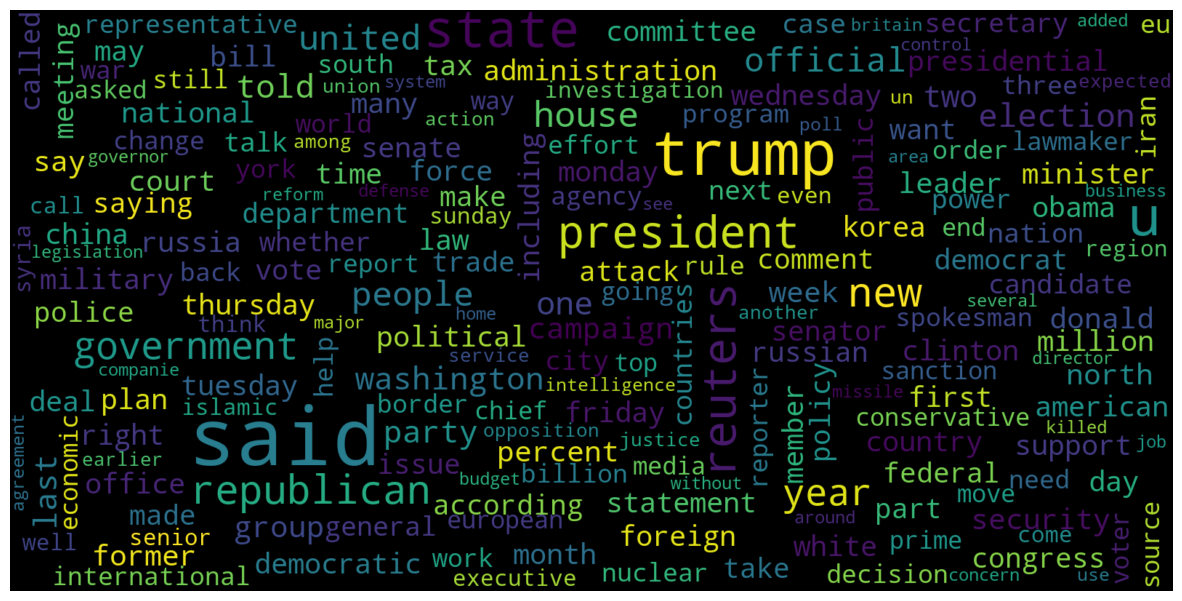

In [11]:
# Real
consolidated = ' '.join(
	word for word in data['text'][data['class'] == 1].astype(str))
wordCloud = WordCloud(width=1600,
					height=800,
					random_state=21,
					max_font_size=110,
					collocations=False)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()


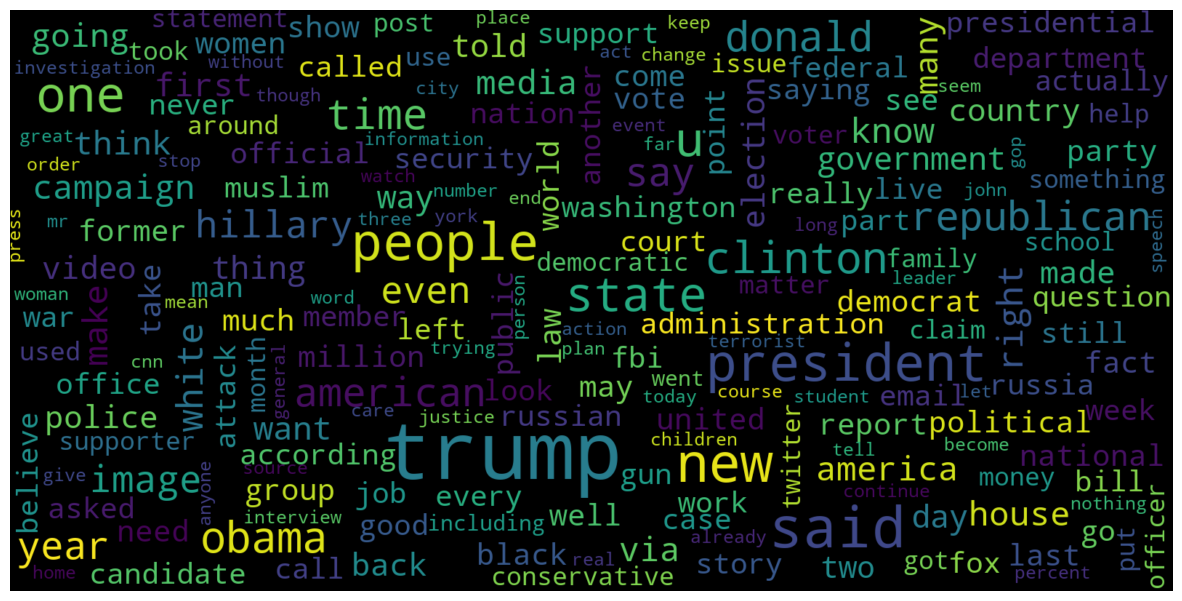

In [12]:
# Fake
consolidated = ' '.join(
	word for word in data['text'][data['class'] == 0].astype(str))
wordCloud = WordCloud(width=1600,
					height=800,
					random_state=21,
					max_font_size=110,
					collocations=False)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()


<AxesSubplot: title={'center': 'Bar Chart of Top Words Frequency'}, xlabel='Top Words', ylabel='Count'>

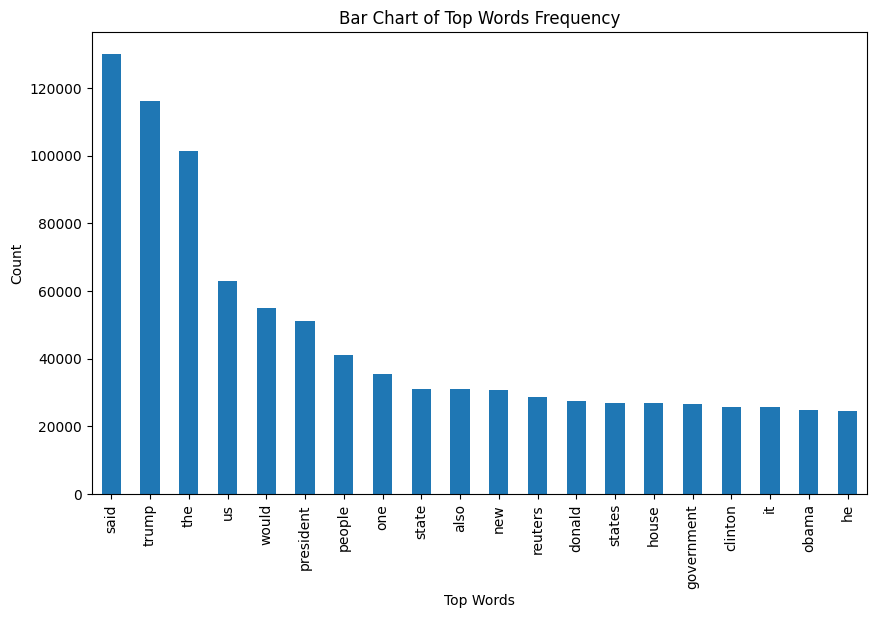

In [13]:
from sklearn.feature_extraction.text import CountVectorizer


def get_top_n_words(corpus, n=None):
	vec = CountVectorizer().fit(corpus)
	bag_of_words = vec.transform(corpus)
	sum_words = bag_of_words.sum(axis=0)
	words_freq = [(word, sum_words[0, idx])
				for word, idx in vec.vocabulary_.items()]
	words_freq = sorted(words_freq, key=lambda x: x[1],
						reverse=True)
	return words_freq[:n]


common_words = get_top_n_words(data['text'], 20)
df1 = pd.DataFrame(common_words, columns=['Review', 'count'])

df1.groupby('Review').sum()['count'].sort_values(ascending=False).plot(
	kind='bar',
	figsize=(10, 6),
	xlabel="Top Words",
	ylabel="Count",
	title="Bar Chart of Top Words Frequency"
)


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

x_train, x_test, y_train, y_test = train_test_split(data['text'],
													data['class'],
													test_size=0.25)


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
x_train = vectorization.fit_transform(x_train)
x_test = vectorization.transform(x_test)


# training the model with logistic regression

In [16]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

# testing the model
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))


0.9933509454124492
0.9910952804986642


# Confusion matrix of Results from Decision Tree classification

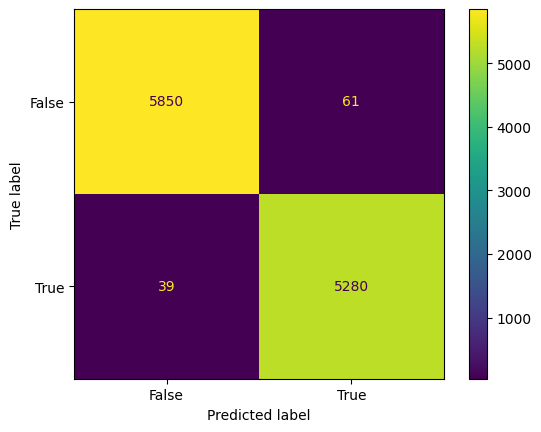

In [17]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, model.predict(x_test))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
											display_labels=[False, True])

cm_display.plot()
plt.show()

# training the model with gaussian naive bayes 

In [18]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import  MultinomialNB

In [19]:
from sklearn.naive_bayes import GaussianNB
classifier = MultinomialNB()
classifier.fit(x_train, y_train)

MultinomialNB()

In [20]:
y_pred  =  classifier.predict(x_test)
y_pred

array([1, 1, 1, ..., 0, 0, 1], dtype=int64)

In [21]:
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn import metrics


In [22]:
cmn = confusion_matrix(y_test, y_pred)
cmn

array([[5558,  353],
       [ 236, 5083]], dtype=int64)

In [23]:
ac = accuracy_score(y_test,y_pred)
ac

0.9475512021371327

# training the model with random forest 

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)
classifier_rf.fit(x_train, y_train)



RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

# checking the oob score

In [26]:
classifier_rf.oob_score_

0.8693638873222713

# Let’s do hyperparameter tuning for Random Forest using GridSearchCV and fit the data.

In [27]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

In [28]:
from sklearn.model_selection import GridSearchCV
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [29]:
grid_search.fit(x_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [30]:
grid_search.best_score_

0.9795186939798253

In [31]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_estimators=200,
                       n_jobs=-1, random_state=42)

In [32]:
rf_best.feature_importances_

array([0., 0., 0., ..., 0., 0., 0.])

# SVM for model training

In [33]:
from sklearn import svm
from sklearn.svm import SVC

In [34]:
clf = svm.SVC()
clf.fit(x_train,y_train)

SVC()

In [35]:
Classifier = SVC(kernel="linear")

In [36]:
Classifier.fit(x_train, y_train)

# Using the model to predict the labels of the test data
y_pred1 = Classifier.predict(x_test)

# Evaluating the accuracy of the model using the sklearn functions
accuracy1 = accuracy_score(y_test,y_pred1)*100
confusion_mat = confusion_matrix(y_test,y_pred1)

# Printing the results
print("Accuracy for SVM is:",accuracy1)
print("Confusion Matrix")
print(confusion_mat)

Accuracy for SVM is: 99.59038290293856
Confusion Matrix
[[5881   30]
 [  16 5303]]


# Multilayer perceptron neural network

In [37]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
import matplotlib.pyplot as plt
import numpy as np

In [38]:
print(x_train.shape) 
print(x_test.shape) 
print(y_train.shape) 
print(y_test.shape) 

(33689, 197285)
(11230, 197285)
(33689,)
(11230,)


In [39]:
from sklearn.feature_selection import SelectKBest, chi2

# Select the k best features
k = 5000
selector = SelectKBest(chi2, k=k)
x_train_new = selector.fit_transform(x_train, y_train)
x_test_new = selector.transform(x_test)

# Print the new shapes
print(x_train_new.shape)
print(x_test_new.shape)

(33689, 5000)
(11230, 5000)


In [45]:
model = Sequential()
   
model.add(Dense(50,input_shape=(5000,),activation='relu'))
model.add(Dropout(0.2))
    
model.add(Dense(100,activation='relu'))
model.add(Dropout(0.3))
    
model.add(Dense(150,activation='relu'))
model.add(Dropout(0.4))
    
model.add(Dense(200,activation='relu'))
model.add(Dropout(0.5))
    
model.add(Dense(1,activation='sigmoid'))
    
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 50)                250050    
                                                                 
 dropout_8 (Dropout)         (None, 50)                0         
                                                                 
 dense_11 (Dense)            (None, 100)               5100      
                                                                 
 dropout_9 (Dropout)         (None, 100)               0         
                                                                 
 dense_12 (Dense)            (None, 150)               15150     
                                                                 
 dropout_10 (Dropout)        (None, 150)               0         
                                                                 
 dense_13 (Dense)            (None, 200)              

In [46]:
import numpy as np
from scipy.sparse import csr_matrix

# convert the sparse matrices to dense numpy arrays
x_train_dense = csr_matrix.toarray(x_train_new)
x_test_dense = csr_matrix.toarray(x_test_new)

# train the model using the dense numpy arrays
history = model.fit(x_train_dense, y_train, epochs=10, batch_size=32, validation_data=(x_test_dense, y_test))

Epoch 1/10
1053/1053 [==============================] - 18s 5ms/step - loss: 0.0728 - accuracy: 0.9702 - val_loss: 0.0227 - val_accuracy: 0.9918
Epoch 2/10
1053/1053 [==============================] - 5s 4ms/step - loss: 0.0105 - accuracy: 0.9971 - val_loss: 0.0214 - val_accuracy: 0.9942
Epoch 3/10
1053/1053 [==============================] - 5s 5ms/step - loss: 0.0051 - accuracy: 0.9985 - val_loss: 0.0236 - val_accuracy: 0.9943
Epoch 4/10
1053/1053 [==============================] - 5s 5ms/step - loss: 0.0039 - accuracy: 0.9988 - val_loss: 0.0229 - val_accuracy: 0.9945
Epoch 5/10
1053/1053 [==============================] - 5s 5ms/step - loss: 0.0022 - accuracy: 0.9994 - val_loss: 0.0352 - val_accuracy: 0.9945
Epoch 6/10
1053/1053 [==============================] - 5s 5ms/step - loss: 0.0025 - accuracy: 0.9992 - val_loss: 0.0371 - val_accuracy: 0.9945
Epoch 7/10
1053/1053 [==============================] - 5s 5ms/step - loss: 0.0023 - accuracy: 0.9994 - val_loss: 0.0381 - val_accuracy

In [ ]:
r = sklearn.metrics.confusion_matrix(y_test, y_pred)
print(r)